In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from scipy import stats

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Optimum Classification Model for Heart Attack Dataset
## Goal
The primary objective of this notebook is to determine the most optimal classification model for the Heart Attack dataset. This will be achieved by employing hyperparameter tuning techniques for various classification algorithms, all conducted through the utilization of grid search.

## Dataset

This dataset contains information related to heart attack occurrences. It includes the following columns:

1. **age**: Age of the individual in years.
2. **sex**: Gender of the individual (0: female, 1: male).
3. **cp**: Chest pain type experienced by the individual.
4. **trestbps**: Resting blood pressure of the individual.
5. **chol**: Serum cholesterol levels in mg/dl.
6. **fbs**: Fasting blood sugar level (> 120 mg/dl indicates diabetes, 0: false, 1: true).
7. **restecg**: Resting electrocardiographic results.
8. **thalach**: Maximum heart rate achieved during exercise.
9. **exang**: Exercise induced angina (0: no, 1: yes).
10. **oldpeak**: Depression induced by exercise relative to rest.
11. **slope**: Slope of the peak exercise ST segment.
12. **ca**: Number of major vessels colored by fluoroscopy.
13. **thal**: Thallium heart scan results.
14. **target**: Indicates whether a heart attack has occurred (0: no, 1: yes).

## Methodology
Data Preprocessing: The dataset will be cleaned and preprocessed to handle any missing values, outliers, or irrelevant features. It will be split into training and testing sets to evaluate model performance effectively.

### Classification Algorithms:
Several classification algorithms will be considered, including but not limited to Decision Trees, Random Forest, Support Vector Machines (SVM), K-Nearest Neighbors (KNN), and Ada Boost.

### Hyperparameter Tuning:
For each classification algorithm, a set of hyperparameters will be identified. Grid search will then be employed to explore various combinations of hyperparameters. This process aims to find the optimal configuration that yields the best model performance.

### Model Evaluation:
The models' performance will be evaluated using appropriate metrics such as accuracy, precision, recall, and F1-score. Cross-validation techniques will be applied to ensure the robustness of the models.

### Comparison and Selection:
The results obtained from hyperparameter tuning will be compared across different classification algorithms. The model with the highest performance will be selected as the most optimum classification model for the given Heart Attack dataset.

## Expected Outcome
By the end of this notebook, we expect to identify and present the classification algorithm that demonstrates the highest predictive accuracy for the Heart Attack dataset. This model can then be used to predict heart attack occurrences with better confidence, contributing to improved medical diagnosis and patient care.

In [2]:
df = pd.read_csv('/kaggle/input/heartcsv/heart.csv')

## Data Understanding

In this section, we will delve into a comprehensive understanding of the dataset's features and their significance. This involves exploring the various columns, their data types, potential relationships, and any initial insights that can be gleaned from the data.


In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.shape

(303, 14)

In [8]:
info_per_sex = df.groupby('sex').mean().reset_index()
info_per_sex

,sex,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


In [9]:
cat_columns = ['sex','cp','fbs','restecg','exang','slope','ca']
for column in cat_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'sex': [1 0]
Unique values in column 'cp': [3 2 1 0]
Unique values in column 'fbs': [1 0]
Unique values in column 'restecg': [0 1 2]
Unique values in column 'exang': [0 1]
Unique values in column 'slope': [0 2 1]
Unique values in column 'ca': [0 2 1 3 4]


In [10]:
# Calculate the target percentage for each sex
target_percent = df.groupby('sex')['target'].mean() * 100

# Calculate the exang percentage for each sex
exang_percent = df.groupby('sex')['exang'].mean() * 100

In [11]:
target_percent

sex
0    75.000000
1    44.927536
Name: target, dtype: float64

In [12]:
exang_percent

sex
0    22.916667
1    37.198068
Name: exang, dtype: float64

In [13]:
fbs_counts = df.groupby('sex')['fbs'].value_counts().unstack()
fbs_counts

fbs,0,1
sex,,
0,84,12
1,174,33


In [14]:
exang_counts = df.groupby('sex')['exang'].value_counts().unstack()
exang_counts

exang,0,1
sex,,
0,74,22
1,130,77


## Data Visualization

This section is dedicated to visually exploring the dataset through a variety of charts, graphs, and plots. By creating visual representations of the data, we can gain deeper insights into the distributions, patterns, correlations, and potential outliers present in the dataset.


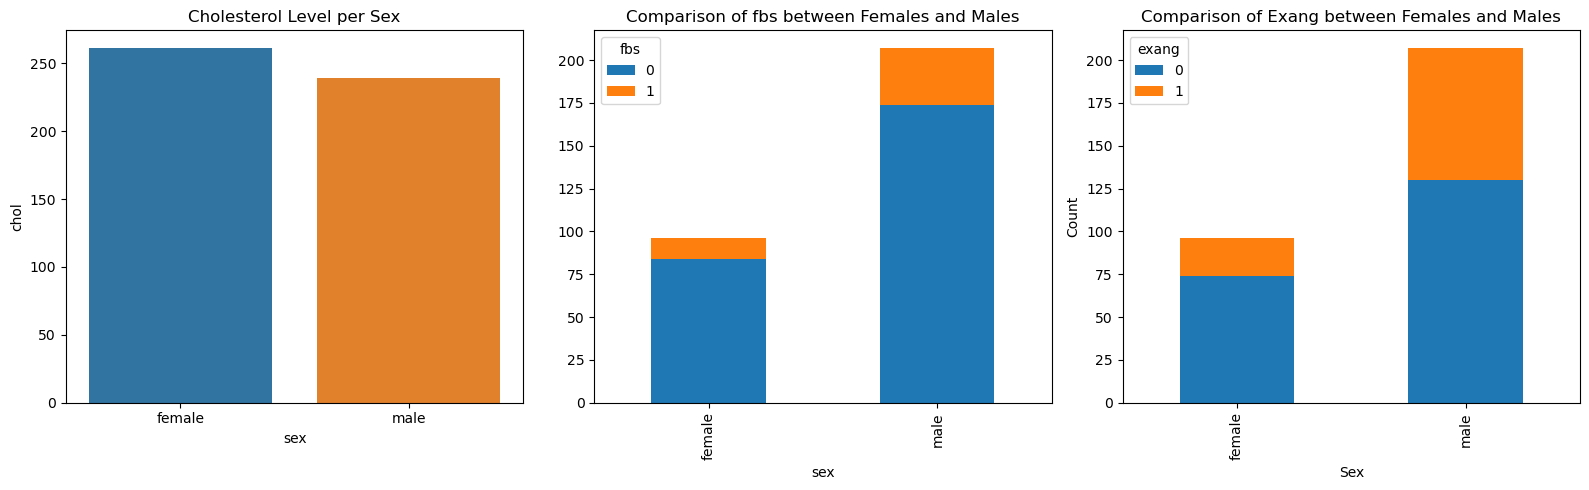

In [15]:
# Create subplots with one row and three columns
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1 - Cholesterol Level
ax1 = axes[0]
sns.barplot(x='sex', y='chol', data=info_per_sex, ax=ax1)
ax1.set_xticklabels(['female', 'male'])
ax1.set_title('Cholesterol Level per Sex')

# Plot 2 - Fasting Blood Sugar Level
ax2 = axes[1]
fbs_counts.plot(kind='bar' , stacked=True, ax=ax2)
ax2.set_xticklabels(['female', 'male'])
ax2.set_title('Comparison of fbs between Females and Males')

# Plot 3 - Comparison of Exang
ax3 = axes[2]
exang_counts.plot(kind='bar', stacked=True, ax=ax3)
ax3.set_xticklabels(['female', 'male'])
ax3.set_xlabel('Sex')
ax3.set_ylabel('Count')
ax3.set_title('Comparison of Exang between Females and Males')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Data Correlation

In this section, we will investigate the correlations between different features in the dataset. By calculating correlation coefficients and creating correlation matrices, we can identify potential relationships and dependencies among variables. This analysis will provide valuable insights into which features might be influential in predicting the target variable and help us understand the interplay between different attributes.


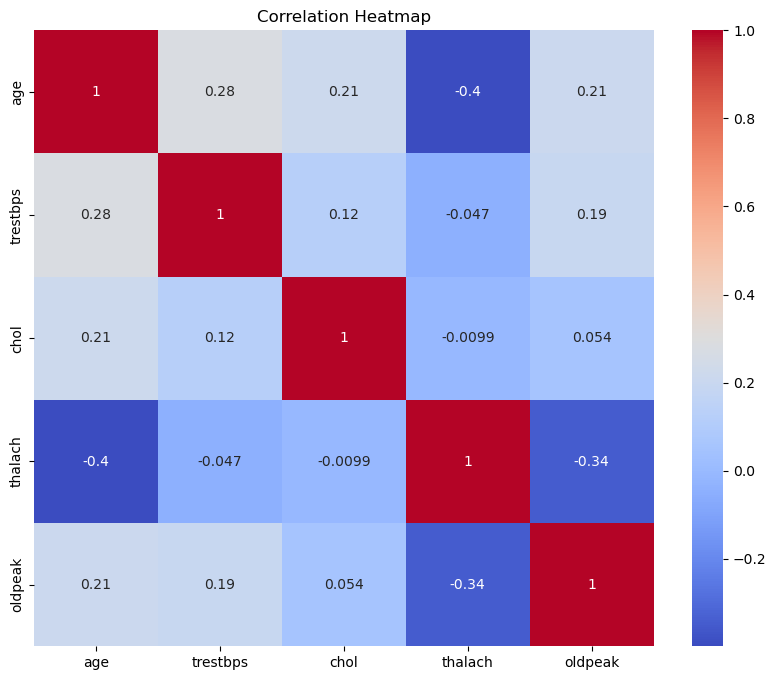

In [16]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [17]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

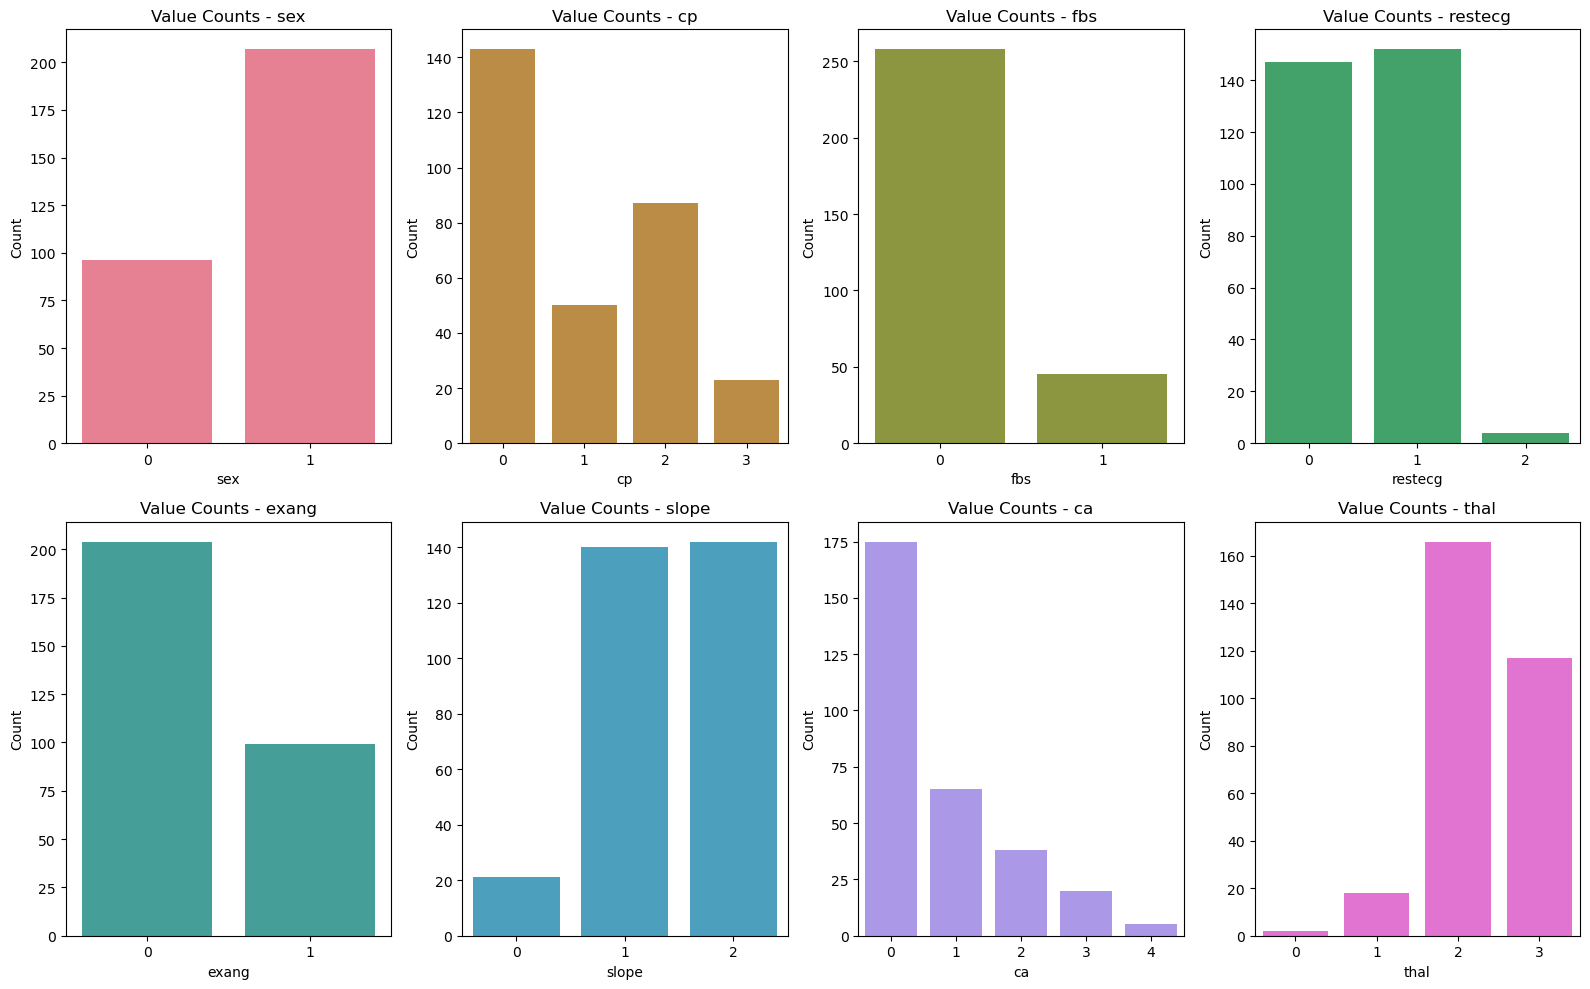

In [18]:
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Calculate the number of rows and columns for the subplots
num_rows = 2
num_cols = 4

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))

# Set a beautiful color palette
color_palette = sns.color_palette('husl', len(cat_columns))

# Iterate over the categorical columns
for i, column in enumerate(cat_columns):
    # Calculate the subplot index
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Create a countplot with a beautiful color palette on the corresponding subplot
    ax = axes[row_idx, col_idx]
    sns.countplot(data=df, x=column, ax=ax, palette=[color_palette[i]])

    # Set axis labels and title
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_title(f'Value Counts - {column}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

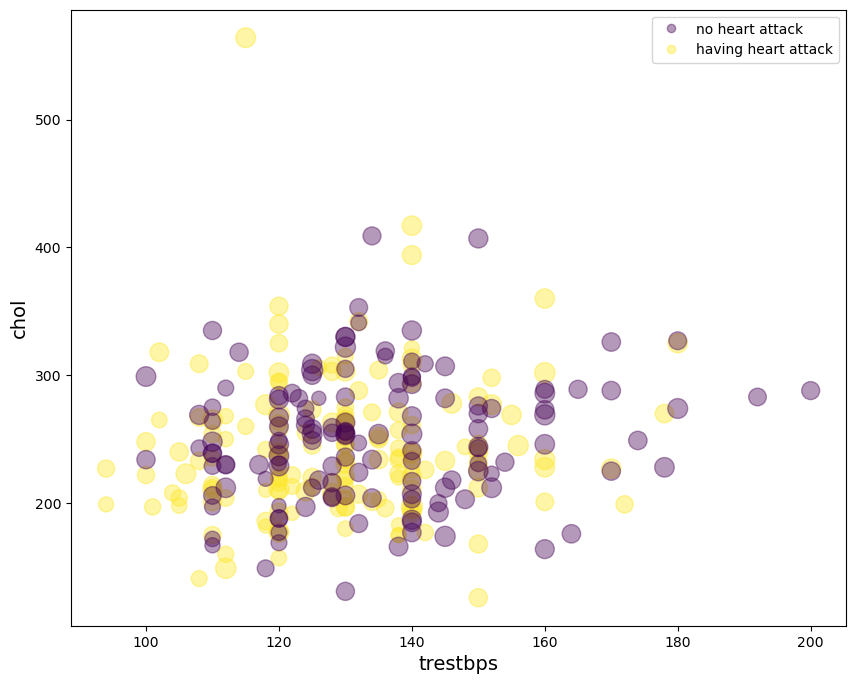

In [19]:
# Set up the scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
scatter_plot = ax.scatter(df['trestbps'], df['chol'], s=df['age'] * 3, c=df['target'], alpha=0.4)

# Increase the font size of the axis labels
ax.set_xlabel('trestbps', fontsize=14)
ax.set_ylabel('chol', fontsize=14)

# Define labels for each color
labels = ['no heart attack', 'having heart attack']

# Create a legend with the labels
ax.legend(handles=scatter_plot.legend_elements()[0], labels=labels)

# Show the plot
plt.show()

## Outlier Detection and Removal

In this section, we will focus on detecting and managing outliers within the dataset. Outliers are data points that deviate significantly from the majority of the data and can have a significant impact on analysis and modeling. We will employ various techniques to identify outliers, visualize their presence, and make informed decisions about whether to remove or handle them. The goal is to ensure the integrity and reliability of our data for subsequent analysis and modeling steps.


In [20]:
# Define a threshold for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify outliers using the IQR method
outliers = pd.DataFrame()

for column in numerical_columns:
    # Calculate the IQR for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Identify outliers in the column
    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Append the outliers to the result DataFrame
    outliers = pd.concat([outliers, column_outliers])

# Print the rows containing outliers
print("Rows with outliers:")
print(outliers)

Rows with outliers:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
8     52    1   2       172   199    1        1      162      0      0.5   
101   59    1   3       178   270    0        0      145      0      4.2   
110   64    0   0       180   325    0        1      154      1      0.0   
203   68    1   2       180   274    1        0      150      1      1.6   
223   56    0   0       200   288    1        0      133      1      4.0   
241   59    0   0       174   249    0        1      143      1      0.0   
248   54    1   1       192   283    0        0      195      0      0.0   
260   66    0   0       178   228    1        1      165      1      1.0   
266   55    0   0       180   327    0        2      117      1      3.4   
28    65    0   2       140   417    1        0      157      0      0.8   
85    67    0   2       115   564    0        0      160      0      1.6   
96    62    0   0       140   394    0        0      157      0     

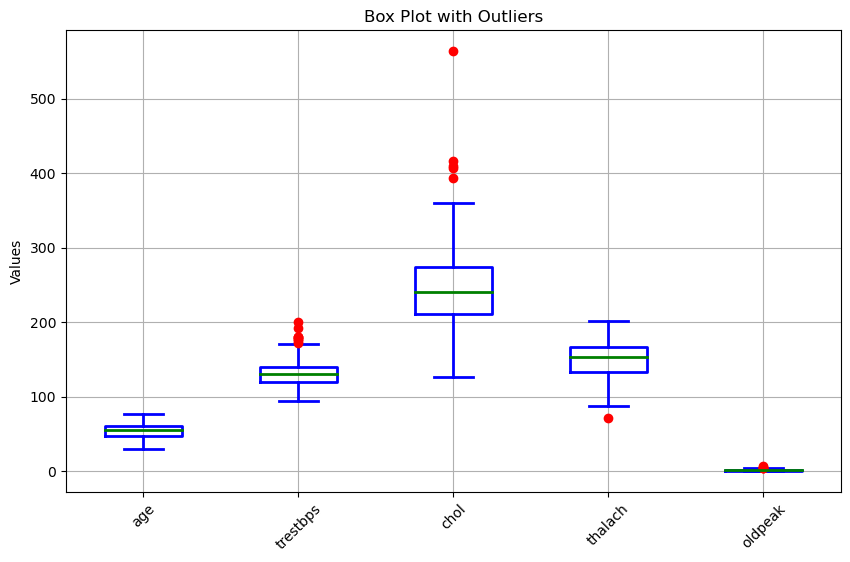

In [21]:
# Create a box plot for each numerical column
plt.figure(figsize=(10, 6))
boxprops = dict(linewidth=2, color='b')
whiskerprops = dict(linewidth=2, color='b')
capprops = dict(linewidth=2, color='b')
flierprops = dict(marker='o', markersize=6, markerfacecolor='r', markeredgecolor='r')
medianprops = dict(linewidth=2, color='g')
df.boxplot(column=numerical_columns, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, medianprops=medianprops)
# Annotate the outliers in the plot
for i, row in outliers.iterrows():
    plt.annotate(f'{row.name}', (row.name, row[numerical_columns[0]]), textcoords="offset points", xytext=(0,-10), ha='center', fontsize=8, color='r')

# Show the plot
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.title('Box Plot with Outliers')
plt.show()

In [22]:
outliers.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


In [23]:
# Delete the rows containing outliers from the original DataFrame
df2 = df.drop(outliers.index)

# Print the deleted rows containing outliers
print("Deleted rows with outliers:")
print(outliers)

# Print the updated DataFrame without outliers
print("DataFrame without outliers:")
print(df2)

Deleted rows with outliers:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
8     52    1   2       172   199    1        1      162      0      0.5   
101   59    1   3       178   270    0        0      145      0      4.2   
110   64    0   0       180   325    0        1      154      1      0.0   
203   68    1   2       180   274    1        0      150      1      1.6   
223   56    0   0       200   288    1        0      133      1      4.0   
241   59    0   0       174   249    0        1      143      1      0.0   
248   54    1   1       192   283    0        0      195      0      0.0   
260   66    0   0       178   228    1        1      165      1      1.0   
266   55    0   0       180   327    0        2      117      1      3.4   
28    65    0   2       140   417    1        0      157      0      0.8   
85    67    0   2       115   564    0        0      160      0      1.6   
96    62    0   0       140   394    0        0      157    

In [24]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Preprocessing

In this section, we will perform essential data preprocessing steps to prepare the dataset for model training. The following two key techniques will be applied:

### Standard Scaling

Standard Scaling, also known as Z-score normalization, will be employed to transform numerical features. This process ensures that the numerical features have a mean of 0 and a standard deviation of 1, which can improve the performance of certain machine learning algorithms that are sensitive to feature scales.

### One-Hot Encoding (OHE)

Categorical features often require conversion into numerical format for machine learning algorithms. One-Hot Encoding will be used to convert categorical variables into binary vectors, where each category is represented by a separate binary column. This approach allows the algorithm to understand categorical information without assuming any ordinal relationship among categories.

By performing these preprocessing steps, we aim to enhance the compatibility of the dataset with various classification algorithms and contribute to the overall robustness of our analysis.


In [25]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical columns and transform the data
df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])

In [26]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.984857,1,3,0.983507,-0.203189,1,0,-0.001865,0,1.319305,0,0,1,1
1,-1.858061,1,2,0.005738,0.177337,0,1,1.631492,0,2.490799,0,0,2,1
2,-1.420689,0,1,0.005738,-0.852322,0,0,0.969320,0,0.440685,2,0,2,1
3,0.219456,1,1,-0.646108,-0.136037,0,1,1.234189,0,-0.145062,2,0,2,1
4,0.328799,0,0,-0.646108,2.505263,0,1,0.572017,1,-0.340311,2,0,2,1


In [27]:
X = df2.drop('target' , axis = 1).values
y = df2['target'].values

In [28]:
X.shape

(284, 13)

In [29]:
X[:,10]

array([0., 0., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 0.,
       2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 0., 2., 2., 2., 0., 2., 0.,
       2., 2., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 2.,
       1., 2., 2., 2., 1., 1., 1., 2., 2., 1., 2., 2., 2., 1., 1., 2., 2.,
       1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 0., 2., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1.,
       1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1.,
       2., 0., 2., 2., 2., 2., 1., 1., 0., 1., 0., 1., 0., 1., 2., 1., 1.,
       2., 2., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 0., 1., 1., 1., 1., 2., 1.,
       1., 0., 1., 2., 2.

In [30]:


# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder(sparse=False)

# Fit and transform the column using the encoder
# encoded_column = encoder.fit_transform(X[: , 11])


ct = ColumnTransformer([('Slope', OneHotEncoder(), [10])], remainder='passthrough')
X = ct.fit_transform(X)
X.shape


(284, 15)

In [31]:
X[7,:]

array([ 0.        ,  0.        ,  1.        , -1.09265982,  1.        ,
        1.        , -0.64610769,  0.46832788,  0.        ,  1.        ,
        1.01346496,  0.        , -0.92605757,  0.        ,  3.        ])

In [32]:
column_names = ['slope_1', 'slope_2', 'slope_3'] + list(df2.drop(['target', 'slope'], axis=1).columns)
df_encoded= pd.DataFrame(X , columns = column_names)
df_encoded['target'] = y
df_encoded.head()

,slope_1,slope_2,slope_3,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,target
0,1.0,0.0,0.0,0.984857,1.0,3.0,0.983507,-0.203189,1.0,0.0,-0.001865,0.0,1.319305,0.0,1.0,1
1,1.0,0.0,0.0,-1.858061,1.0,2.0,0.005738,0.177337,0.0,1.0,1.631492,0.0,2.490799,0.0,2.0,1
2,0.0,0.0,1.0,-1.420689,0.0,1.0,0.005738,-0.852322,0.0,0.0,0.969320,0.0,0.440685,0.0,2.0,1
3,0.0,0.0,1.0,0.219456,1.0,1.0,-0.646108,-0.136037,0.0,1.0,1.234189,0.0,-0.145062,0.0,2.0,1
4,0.0,0.0,1.0,0.328799,0.0,0.0,-0.646108,2.505263,0.0,1.0,0.572017,1.0,-0.340311,0.0,2.0,1


## Checking Distribution by Visualization

In this section, we will visually explore the distribution of key features within the dataset. By creating histograms, we can gain insights into the distribution patterns of numerical attributes. Understanding the distribution of data is crucial for identifying potential skewness, outliers, or anomalies that might impact the performance of our models.


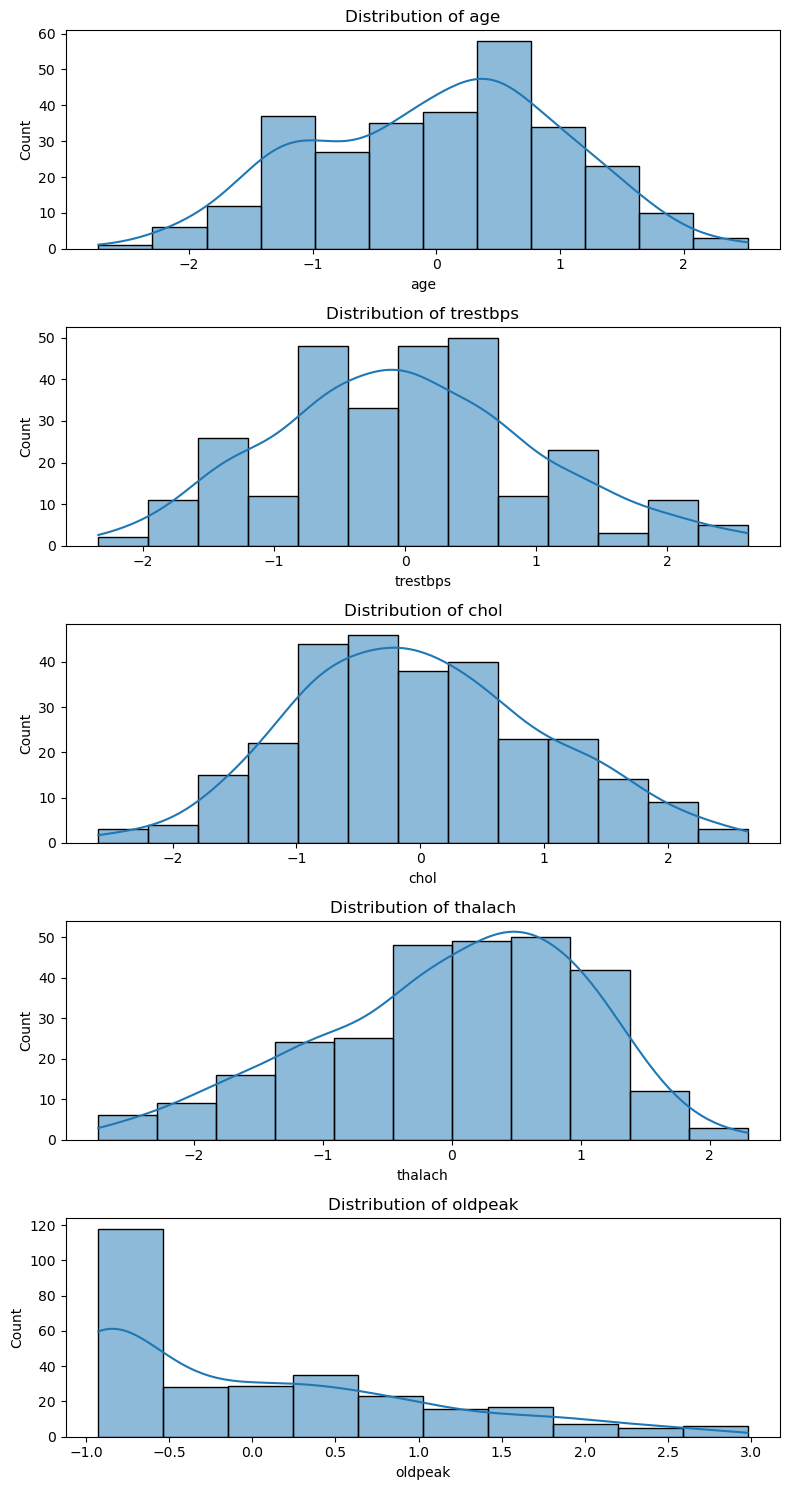

In [33]:
# Create subplots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(8, 15))

# Iterate over the numerical columns and plot the distributions
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(data=df_encoded, x=column, kde=True, ax=ax)
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(column)

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


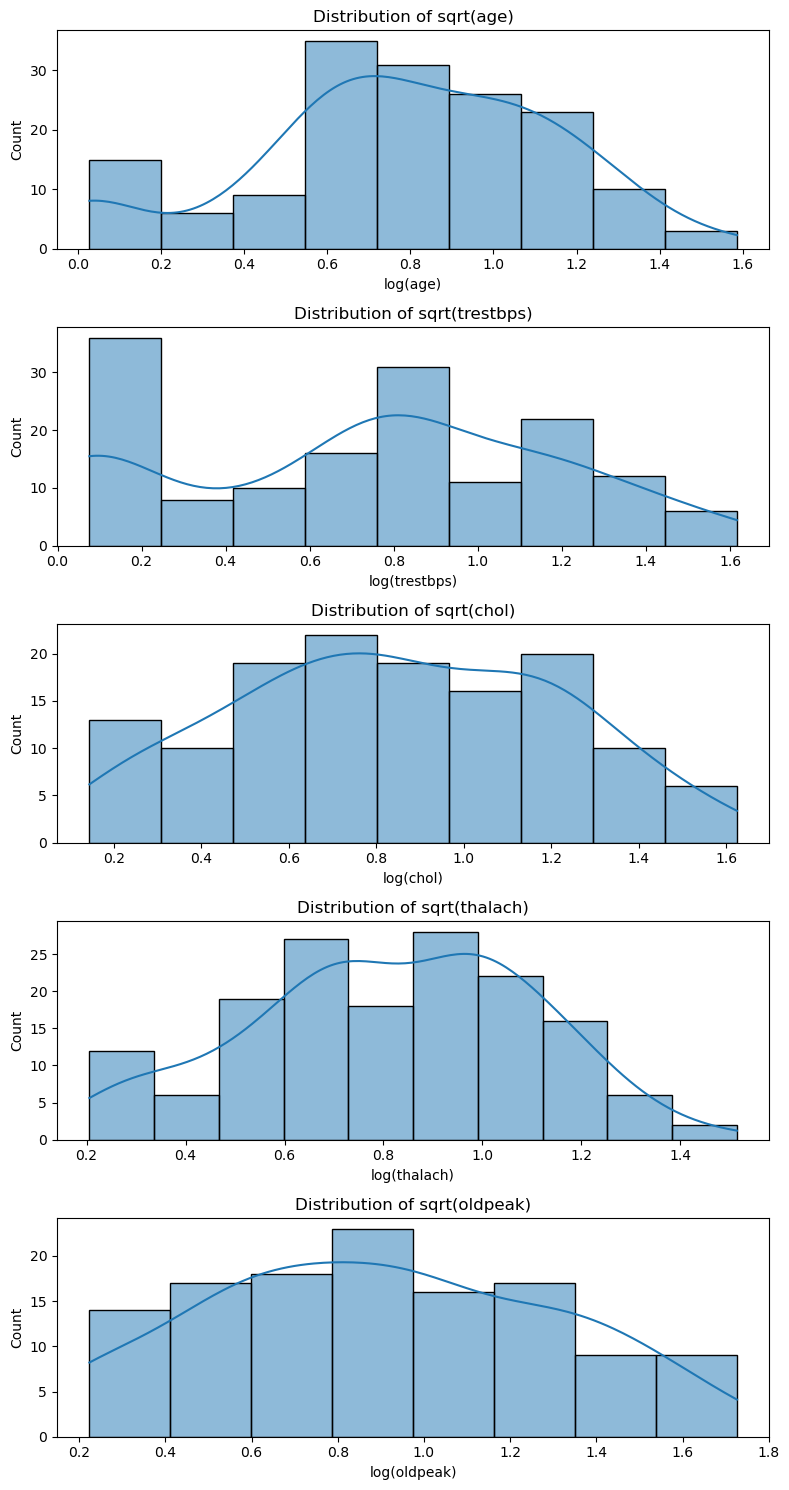

In [34]:
# Apply logarithmic transformation to the numerical columns
df_log = np.sqrt(df_encoded[numerical_columns])

# Create subplots for each transformed column
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(8, 15))

# Iterate over the transformed columns and plot the distributions
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(data=df_log, x=column, kde=True, ax=ax)
    ax.set_title(f"Distribution of sqrt({column})")
    ax.set_xlabel(f"log({column})")

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
df_encoded[numerical_columns].isnull().sum()

age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64

In [36]:
df[numerical_columns].isnull().sum()

age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64

# Hyperparameter Tuning and Model Evaluation

In this section, we initiate the process of hyperparameter tuning for several classification algorithms and subsequently evaluate their performance using grid search and cross-validation.

We have selected the following classification algorithms for tuning and evaluation:

- **SVC (Support Vector Classifier)**: A versatile classifier known for its strong generalization capabilities.
- **Decision Tree**: A tree-based classifier that makes decisions based on feature conditions.
- **Random Forest**: An ensemble classifier that uses multiple decision trees to improve accuracy.
- **AdaBoost**: An ensemble method that combines multiple weak learners to create a strong classifier.
- **KNN (K-Nearest Neighbors)**: A simple instance-based classification method that classifies data points based on their proximity to neighbors.

For each of these models, we have defined specific hyperparameter grids to explore different combinations of hyperparameters. We then employ GridSearchCV to perform a grid search with cross-validation, optimizing for the recall score as the evaluation metric.

After the grid search, we display the best parameters and the corresponding best recall score achieved for each model. Additionally, we evaluate the best-tuned model's performance on the test dataset, displaying the classification report, which includes precision, recall, F1-score, and support metrics for each class.

This comprehensive hyperparameter tuning and evaluation process will help us identify the most suitable classification model with optimal parameters for our heart attack dataset.


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer, recall_score

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# SVC
svc_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 'scale']}

# Decision Tree
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}

# Random Forest
rf_params = {'n_estimators': [100, 200, 300], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}

# AdaBoostClassifier
ada_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 1, 10]}

# KNN
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

In [40]:
# Create a dictionary of models and their corresponding hyperparameters
models = {
    'SVC': (SVC(), svc_params),
    'Decision Tree': (DecisionTreeClassifier(), dt_params),
    'Random Forest': (RandomForestClassifier(), rf_params),
    'AdaBoost': (AdaBoostClassifier(), ada_params),
    'KNN': (KNeighborsClassifier(), knn_params)
}

# Perform grid search for each model
results = {}
for model_name, (model, params) in models.items():
    scorer = make_scorer(recall_score)
    grid_search = GridSearchCV(model, params, scoring=scorer, cv=3, n_jobs=-1, verbose=10)
    grid_search.fit(X_train, y_train)
    results[model_name] = grid_search

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3; 1/18] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/3; 1/18] END C=0.1, gamma=0.1, kernel=linear;, score=0.907 total time=   0.0s
[CV 2/3; 2/18] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/3; 2/18] END C=0.1, gamma=0.1, kernel=rbf;, score=0.977 total time=   0.0s
[CV 3/3; 2/18] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 2/18] END C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 1/3; 3/18] START C=0.1, gamma=1, kernel=linear..............................
[CV 1/3; 3/18] END C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   0.0s
[CV 2/3; 3/18] START C=0.1, gamma=1, kernel=linear..............................
[CV 2/3; 3/18] END C=0.1, gamma=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 3/3; 3/18] START C=0.1, gamma=1, kernel=linear............

In [41]:
for model_name, result in results.items():
    print(f"Best parameters for {model_name}: {result.best_params_}")
    print(f"Best recall score for {model_name}: {result.best_score_}")
    print()

Best parameters for SVC: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best recall score for SVC: 1.0

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}
Best recall score for Decision Tree: 0.7892211148025101

Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best recall score for Random Forest: 0.8911037283130305

Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 50}
Best recall score for AdaBoost: 0.8595422665190107

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best recall score for KNN: 0.9221114802510151



In [42]:
from sklearn import metrics

for model_name, result in results.items():
    best_model = result.best_estimator_
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    
    print(f"Best parameters for {model_name}: {result.best_params_}")
    print(f"Best Recall score: {result.best_score_:.4f}")
    
    # Print the classification report
    classification_rep = metrics.classification_report(y_test, y_pred)
    print(f"Classification report for {model_name}:")
    print(classification_rep)
    print()

Best parameters for SVC: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best Recall score: 1.0000
Classification report for SVC:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.54      1.00      0.70        31

    accuracy                           0.54        57
   macro avg       0.27      0.50      0.35        57
weighted avg       0.30      0.54      0.38        57


Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}
Best Recall score: 0.7892
Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.74      0.88      0.81        26
           1       0.88      0.74      0.81        31

    accuracy                           0.81        57
   macro avg       0.81      0.81      0.81        57
weighted avg       0.82      0.81      0.81        57


Best parameters for Random Forest: {'criterion': 'entro

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 50}
Best Recall score: 0.8595
Classification report for AdaBoost:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        26
           1       0.96      0.87      0.92        31

    accuracy                           0.91        57
   macro avg       0.91      0.92      0.91        57
weighted avg       0.92      0.91      0.91        57


Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best Recall score: 0.9221
Classification report for KNN:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.84      0.87      0.86        31

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57




## Best Model Selection

After conducting hyperparameter tuning and evaluating the performance of various classification algorithms, we have determined that the **AdaBoost** classifier exhibits the highest F1 score of 92%. This score indicates a strong balance between precision and recall, making it a promising choice for predicting heart attack occurrences.

The AdaBoost algorithm effectively combines multiple weak learners to create a robust classifier, and the hyperparameter tuning process has further enhanced its performance. With its superior F1 score, the AdaBoost model emerges as the most suitable candidate for accurate heart attack prediction based on our dataset.
